# Clustering

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from fuzzywuzzy import fuzz
import re

In [2]:
cleaned_df = pd.read_csv("../Dataset/New_Data/5_zeros_removed_cleaned.csv", low_memory=False)

In [3]:
cleaned_df

,ad_id,UID,city,heading,desc,posted_date,price,price_land_pp,price_land_pa,price_land_total,...,contact_name,email,city_no,city_name,city_lat,city_lon,g_city_lat,g_city_lon,main_city,main_city_id
0,232745,71194,Colombo 6,Ideal plot of land in Colombo 06,The perfect plot of land for your residence in...,1/19/2018 18:48,45000000,45000000.0,7.200000e+09,281250000.0,...,Linea Property,Lineaproperty@gmail.com,6,Colombo 6,6.874691,79.860748,6.874691,79.860748,Colombo 6,0.0
1,237182,29192,Nugegoda,Excellent Block Of 69 Perches Facing Highlevel...,This Valuable Block is Located Next to Prime L...,2/23/2018 0:33,10000000,10000000.0,1.600000e+09,600000000.0,...,prabash perera,rangala08@gmail.com,27,Nugegoda,6.864908,79.899681,6.864908,79.899681,Nugegoda,1.0
2,245752,71194,Colombo 8,6 perch land at Borella for sale,The perfect location to build your dream home ...,5/8/2018 13:44,42000000,7000000.0,1.120000e+09,42000000.0,...,Linea Property,Lineaproperty@gmail.com,8,Colombo 8,6.914720,79.877800,6.912180,79.882881,Colombo 8,0.0
3,251172,17540,Battaramulla,56.7P Land Directly Overlooking Parliment Grou...,?Our Reference No. SL 8551<br />\n<br />\n(Ple...,6/25/2018 10:26,141750000,2500000.0,0.000000e+00,141750000.0,...,Bimsara B Gamage,homes@bimsara.com,1710,Battaramulla,6.898378,79.922256,6.897994,79.922287,Battaramulla,54.0
4,253432,71194,Colombo 8,Land for sale in Borella,The perfect plot of land for your business or ...,7/12/2018 14:46,65000000,7926829.0,0.000000e+00,65000000.0,...,Linea Property,Lineaproperty@gmail.com,8,Colombo 8,6.914720,79.877800,6.912180,79.882881,Colombo 8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41330,5528437,193404,Kahathuduwa,Land For Sale In Near To Kahathuduwa,?120 ප්‍රධාන බස් පාරගයට මීටර 30ක දුරකි..<br />...,8/10/2023 8:50,875000,875000.0,0.000000e+00,8750000.0,...,Prestige Property 01.,wikcramawijesiri2000@gmail.com,5128,Kahathuduwa,6.782298,79.994797,6.782298,79.994797,Kahathuduwa,NaN
41331,5410000,53682,Dehiwala,Land for Sale in Dehiwela Kalubowila,"Land for Sale in Dehiwela Kalubowila, 19.5p, P...",1/3/2023 8:45,4000000,4000000.0,0.000000e+00,78000000.0,...,Shaaan,shanmultiproperties@gmail.com,24,Dehiwala,6.830119,79.880081,6.830119,79.880081,Dehiwala,4.0
41332,5446833,120689,Malabe,Commercial Land For Sale,"Address: Kaduwela Main Road (New Kandy Road), ...",3/12/2023 2:49,23250000,23250000.0,0.000000e+00,651000000.0,...,Divasiri Thotasinghe Arachchige,divasiri@gmail.com,69,Malabe,6.906079,79.969627,6.906079,79.969627,Malabe,8.0
41333,5447305,195582,Piliyandala,Land for Sale in Kahapola-Piliyandala,Valuable Land situated at the Kahapola junctio...,3/12/2023 9:29,675000,675000.0,0.000000e+00,7202250.0,...,sasanka wijeratne,sasanka.biz@gmail.com,36,Piliyandala,6.801757,79.922729,6.801757,79.922729,Piliyandala,7.0


In [4]:
lng_lat_available_df = cleaned_df[(cleaned_df['lng'].notna()) & (cleaned_df['lat'].notna())]

lng_lat_available_df

KeyError: 'lng'

In [378]:
# output_csv_path = '../Dataset/New_Data/7_lng_lat_available_df.csv' 
# lng_lat_available_df.to_csv(output_csv_path, index=False)

In [379]:
selected_columns = ['city_name', 'main_city', 'price_land_pp', 'lat', 'lng']
filtered_lat_lng_df = lng_lat_available_df[selected_columns]

In [380]:
filtered_lat_lng_df

,city_name,main_city,price_land_pp,lat,lng
28,Rajagiriya,rajagiriya,1600000.0,6.914671,79.911289
38,Dehiwala,dehiwala,3000000.0,6.848864,79.874984
43,Homagama,homagama,285000.0,6.855431,80.080820
54,Malabe,malabe,1000000.0,6.906933,79.960866
91,Mirihana,nugegoda,3250000.0,6.873143,79.904349
...,...,...,...,...,...
40946,Katubedda,moratuwa,1000000.0,6.801457,79.899679
40947,Homagama,homagama,1325000.0,6.855420,80.004213
40948,Malabe,malabe,1550000.0,6.892407,79.972009
40956,Malabe,malabe,23250000.0,6.903917,79.959803


In [381]:
missing_data_perc = pd.DataFrame({'total_missing': filtered_lat_lng_df.isnull().sum()})
missing_data_perc

,total_missing
city_name,0
main_city,0
price_land_pp,1
lat,0
lng,0


In [382]:
filtered_lat_lng_df = filtered_lat_lng_df.dropna()

In [383]:
filtered_lat_lng_df_for_clustering = filtered_lat_lng_df.copy()

In [384]:
filtered_lat_lng_df_label = filtered_lat_lng_df.copy()
filtered_lat_lng_df_kmodes = filtered_lat_lng_df.copy()
filtered_lat_lng_df_kprototypes = filtered_lat_lng_df.copy()

In [385]:
filtered_lat_lng_df_for_clustering

,city_name,main_city,price_land_pp,lat,lng
28,Rajagiriya,rajagiriya,1600000.0,6.914671,79.911289
38,Dehiwala,dehiwala,3000000.0,6.848864,79.874984
43,Homagama,homagama,285000.0,6.855431,80.080820
54,Malabe,malabe,1000000.0,6.906933,79.960866
91,Mirihana,nugegoda,3250000.0,6.873143,79.904349
...,...,...,...,...,...
40946,Katubedda,moratuwa,1000000.0,6.801457,79.899679
40947,Homagama,homagama,1325000.0,6.855420,80.004213
40948,Malabe,malabe,1550000.0,6.892407,79.972009
40956,Malabe,malabe,23250000.0,6.903917,79.959803


In [386]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [387]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['city_name', 'main_city']

label_encoder = LabelEncoder()
for column in categorical_columns:
    filtered_lat_lng_df[column] = label_encoder.fit_transform(filtered_lat_lng_df[column])


C:\Users\User\AppData\Local\Temp\ipykernel_10084\1492572019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_lat_lng_df[column] = label_encoder.fit_transform(filtered_lat_lng_df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_10084\1492572019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_lat_lng_df[column] = label_encoder.fit_transform(filtered_lat_lng_df[column])


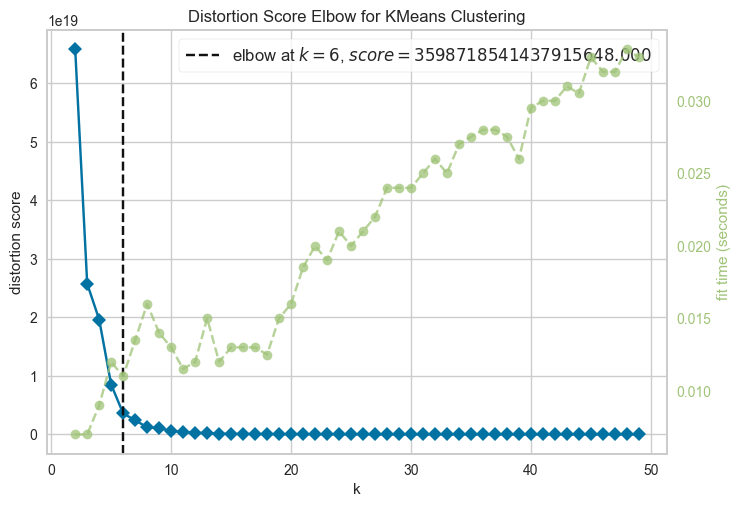

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [388]:
Elbow_M = KElbowVisualizer(KMeans(n_init='auto'), k=(2, 50))
Elbow_M.fit(filtered_lat_lng_df)
Elbow_M.show()

## K-Means with One-hot-encording

In [389]:
from sklearn.cluster import KMeans

def calculate_zscore(df, columns):
  df = df.copy()
  for col in columns:
      df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
  return df

def one_hot_encode(df, columns):
  concat_df = pd.concat([pd.get_dummies(df[col], drop_first=True, prefix=col) for col in columns], axis=1)
  one_hot_cols = concat_df.columns

  return concat_df, one_hot_cols

numeric_cols = filtered_lat_lng_df_for_clustering.select_dtypes(include=np.number)
cat_cols = filtered_lat_lng_df_for_clustering.select_dtypes(include='object')
  
# numeric process
normalized_df = calculate_zscore(filtered_lat_lng_df_for_clustering, numeric_cols)
normalized_df = normalized_df[numeric_cols.columns]

# categorical process
cat_one_hot_df, one_hot_cols = one_hot_encode(filtered_lat_lng_df_for_clustering, cat_cols)
cat_one_hot_norm_df = calculate_zscore(cat_one_hot_df, one_hot_cols)

# Merge DataFrames
processed_df = pd.concat([normalized_df, cat_one_hot_norm_df], axis=1)

clusters = (KMeans(n_clusters=6, init='k-means++', verbose=0, random_state=12345,algorithm='auto').fit(processed_df).labels_)

processed_df["Clusters"] = clusters
filtered_lat_lng_df_for_clustering["Clusters"] = clusters

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_10084\110690312.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  processed_df["Clusters"] = clusters


In [390]:
filtered_lat_lng_df_for_clustering

,city_name,main_city,price_land_pp,lat,lng,Clusters
28,Rajagiriya,rajagiriya,1600000.0,6.914671,79.911289,5
38,Dehiwala,dehiwala,3000000.0,6.848864,79.874984,5
43,Homagama,homagama,285000.0,6.855431,80.080820,5
54,Malabe,malabe,1000000.0,6.906933,79.960866,5
91,Mirihana,nugegoda,3250000.0,6.873143,79.904349,1
...,...,...,...,...,...,...
40946,Katubedda,moratuwa,1000000.0,6.801457,79.899679,5
40947,Homagama,homagama,1325000.0,6.855420,80.004213,5
40948,Malabe,malabe,1550000.0,6.892407,79.972009,5
40956,Malabe,malabe,23250000.0,6.903917,79.959803,5


In [391]:
# Get cluster counts
cluster_counts = filtered_lat_lng_df_for_clustering['Clusters'].value_counts()

# Display the cluster counts
print(cluster_counts)

Clusters
5    8705
2     710
3     424
1     377
0     276
4      25
Name: count, dtype: int64


## K-Means with label encorder

In [392]:
kmeans = KMeans(n_clusters =6 , init = 'k-means++', random_state = 12345)
# fit model and predict clusters
labels = kmeans.fit_predict(filtered_lat_lng_df)
filtered_lat_lng_df_label["Clusters"] = labels

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [393]:
filtered_lat_lng_df_label

,city_name,main_city,price_land_pp,lat,lng,Clusters
28,Rajagiriya,rajagiriya,1600000.0,6.914671,79.911289,0
38,Dehiwala,dehiwala,3000000.0,6.848864,79.874984,0
43,Homagama,homagama,285000.0,6.855431,80.080820,0
54,Malabe,malabe,1000000.0,6.906933,79.960866,0
91,Mirihana,nugegoda,3250000.0,6.873143,79.904349,0
...,...,...,...,...,...,...
40946,Katubedda,moratuwa,1000000.0,6.801457,79.899679,0
40947,Homagama,homagama,1325000.0,6.855420,80.004213,0
40948,Malabe,malabe,1550000.0,6.892407,79.972009,0
40956,Malabe,malabe,23250000.0,6.903917,79.959803,0


In [394]:
# Get cluster counts
cluster_counts = filtered_lat_lng_df_label['Clusters'].value_counts()

# Display the cluster counts
print(cluster_counts)

Clusters
0    10457
4       53
3        4
1        1
5        1
2        1
Name: count, dtype: int64


## K-Modes

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


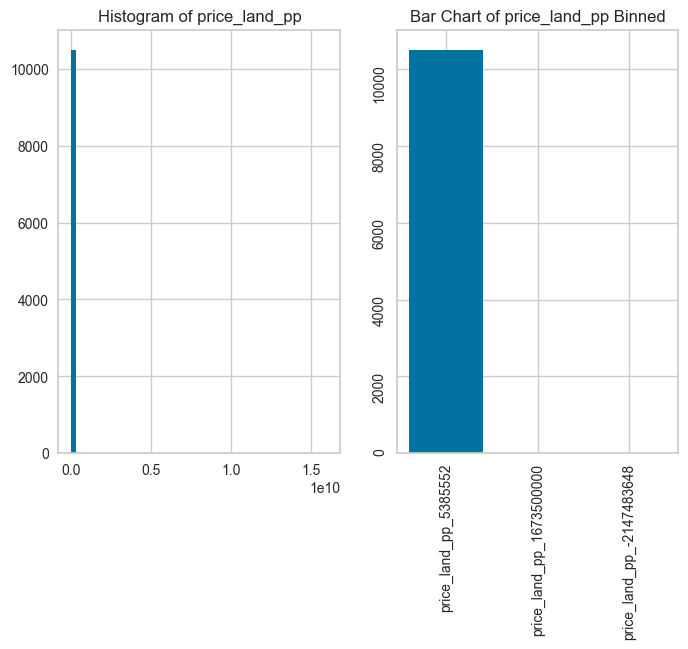

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 800x550 with 0 Axes>

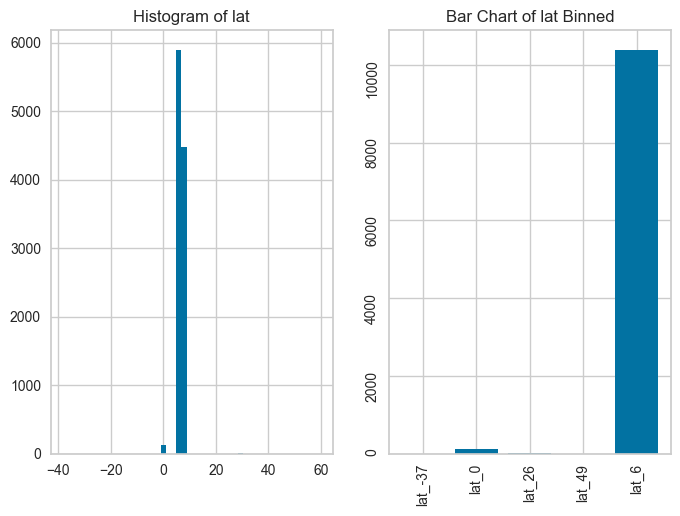

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 800x550 with 0 Axes>

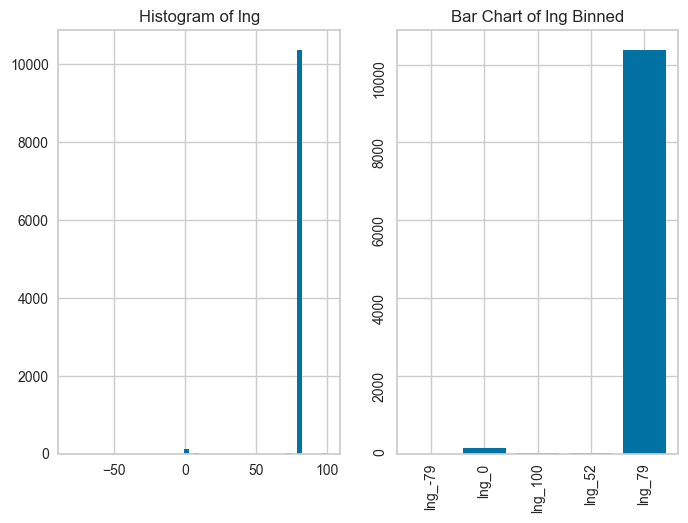

,city_name,main_city,price_land_pp_value,lat_value,lng_value
0,Rajagiriya,rajagiriya,price_land_pp_5385552,lat_6,lng_79
1,Dehiwala,dehiwala,price_land_pp_5385552,lat_6,lng_79
2,Homagama,homagama,price_land_pp_5385552,lat_6,lng_79
3,Malabe,malabe,price_land_pp_5385552,lat_6,lng_79
4,Mirihana,nugegoda,price_land_pp_5385552,lat_6,lng_79


<Figure size 800x550 with 0 Axes>

In [395]:
def get_knn_bins(df, cols, bins=50, drop_cols=True):
  
  for col in cols:
    
    kmeans  = KMeans(n_clusters=bins).fit(df[col].to_frame().values.reshape(-1,1))
    results = pd.DataFrame(kmeans.labels_, columns=[col + '_centroid'])

    df = df.reset_index()
    df[col + '_centroid'] = results[col + '_centroid']
  
    knn_bin_df = pd.DataFrame(kmeans.cluster_centers_)
    knn_bin_df = knn_bin_df.astype(int).reset_index()

    temp_df = pd.merge(df[col + '_centroid'],
                       knn_bin_df, 
                       left_on=col + '_centroid',
                       right_on='index',
                       how='left')

    temp_df = temp_df.rename(columns={0:col+'_value'})

    temp_df.loc[:,col+'_value'] = col + '_' + temp_df[col+'_value'].astype(str)

    df = pd.concat([df, temp_df[col+'_value']], axis=1)
    df.drop([col + '_centroid', 'index'], axis=1, inplace=True)


    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.hist(df[col].values, bins=50)
    ax1.set_title('Histogram of ' + col)

    Count_Bins = temp_df[col + '_value'].value_counts().rename_axis('bins').reset_index(name='counts')
    extract_number = Count_Bins.bins.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
    extract_number.columns = ['Text', 'Number']
    Count_Bins['bin_centroid'] = extract_number['Number']
    Count_Bins.sort_values(by=['bin_centroid'], ascending=True, inplace=True)

    ax2.bar(Count_Bins.iloc[:, 0], Count_Bins.iloc[:, 1])
    ax2.set_title('Bar Chart of ' + col + ' Binned')
    ax2.tick_params(labelrotation=90)

    plt.show()
    plt.tight_layout()


  if drop_cols:
    return df.drop(cols, axis=1)

  else:
    return df


recoded_df = get_knn_bins(filtered_lat_lng_df_kmodes, numeric_cols, bins=5)
recoded_df.head()

In [396]:
from kmodes.kmodes import KModes

def column_index(df, query_cols):
  '''
  returns the indices of the query_cols
  '''
  cols = df.columns.values
  sidx = np.argsort(cols)
  return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]


cat_cols = recoded_df.select_dtypes(include='object')
categorical_indices = column_index(recoded_df, cat_cols.columns)
categorical = list(categorical_indices)


kmodes = KModes(verbose=0,
                n_clusters=6, 
                random_state=12345)

kmodes_clusters = kmodes.fit_predict(recoded_df, categorical=categorical)

filtered_lat_lng_df_kmodes["Clusters"] = kmodes_clusters

In [397]:
filtered_lat_lng_df_kmodes

,city_name,main_city,price_land_pp,lat,lng,Clusters
28,Rajagiriya,rajagiriya,1600000.0,6.914671,79.911289,0
38,Dehiwala,dehiwala,3000000.0,6.848864,79.874984,0
43,Homagama,homagama,285000.0,6.855431,80.080820,1
54,Malabe,malabe,1000000.0,6.906933,79.960866,0
91,Mirihana,nugegoda,3250000.0,6.873143,79.904349,5
...,...,...,...,...,...,...
40946,Katubedda,moratuwa,1000000.0,6.801457,79.899679,0
40947,Homagama,homagama,1325000.0,6.855420,80.004213,1
40948,Malabe,malabe,1550000.0,6.892407,79.972009,0
40956,Malabe,malabe,23250000.0,6.903917,79.959803,0


In [398]:
# Get cluster counts
cluster_counts = filtered_lat_lng_df_kmodes['Clusters'].value_counts()

# Display the cluster counts
print(cluster_counts)

Clusters
0    7590
1     815
3     710
4     609
2     416
5     377
Name: count, dtype: int64


## K-Prototypes

In [399]:
numerical_col = ['price_land_pp', 'lat', 'lng']

scaled_numerical = StandardScaler().fit_transform(filtered_lat_lng_df_kprototypes[numerical_col])
filtered_lat_lng_df_kprototypes[numerical_col] = scaled_numerical

In [400]:
# K-prototypes model gets a numpy array, thus converting the df to an array
df_to_array = filtered_lat_lng_df_kprototypes.values

#converting numerical columns datatype as float
numerical_col_index = [2,3,4]
df_to_array[:,numerical_col_index] = df_to_array[:,numerical_col_index].astype(float)

#index of categorical columns
categorical_index = [0, 1]

In [402]:
from kmodes.kprototypes import KPrototypes

# Initiating the KPrototypes Clustering model 
KPro = KPrototypes(n_clusters=6, init='Huang', random_state=1234, n_jobs=-1)
# fit model and predict clusters
KPro.fit_predict(df_to_array, categorical=categorical_index)
print(KPro.cost_)
#new column for cluster labels associated with each subject
filtered_lat_lng_df_kprototypes['clusters'] = KPro.labels_

11685.405271171689


In [403]:
filtered_lat_lng_df_kprototypes

,city_name,main_city,price_land_pp,lat,lng,clusters
28,Rajagiriya,rajagiriya,-0.037691,0.065307,0.109860,1
38,Dehiwala,dehiwala,-0.030664,0.025748,0.105929,1
43,Homagama,homagama,-0.044292,0.029696,0.128216,1
54,Malabe,malabe,-0.040703,0.060656,0.115228,1
91,Mirihana,nugegoda,-0.029409,0.040343,0.109108,1
...,...,...,...,...,...,...
40946,Katubedda,moratuwa,-0.040703,-0.002749,0.108603,1
40947,Homagama,homagama,-0.039071,0.029689,0.119921,1
40948,Malabe,malabe,-0.037942,0.051923,0.116434,1
40956,Malabe,malabe,0.070984,0.058842,0.115113,4


In [405]:
# Get cluster counts
cluster_counts = filtered_lat_lng_df_kprototypes['clusters'].value_counts()

# Display the cluster counts
print(cluster_counts)

clusters
1    8746
4    1614
3     132
2      18
5       4
0       3
Name: count, dtype: int64
